In [841]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [842]:
df1=pd.read_fwf("E:\PROJECTS\College Side Projects\kmeans_using python\IRIS.txt", header=None)
df=pd.DataFrame(df1)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,1
1,7.0,3.2,4.7,1.4,2
2,6.3,3.3,6.0,2.5,3
3,4.9,3.0,1.4,0.2,1
4,6.4,3.2,4.5,1.5,2


In [843]:
x=df.iloc[:,[0,1,2,3]].values #Not taking the label data
print(x[:4])


[[5.1 3.5 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.3 3.3 6.  2.5]
 [4.9 3.  1.4 0.2]]


In [844]:
m=x.shape[0]  #Number of training datas
n=x.shape[1]  #Number of features

k=3            # Number of clusters

In [845]:
Centroids=np.array([]).reshape(n,0) 
for i in range(k):
    random_data=random.randint(0,m-1)
    Centroids=np.c_[Centroids,x[random_data]]
print(Centroids)                                         #Centroid is nxk matrix(each col is centroid to one cluster)

[[5.7 7.7 6.1]
 [2.6 2.8 2.8]
 [3.5 6.7 4.7]
 [1.  2.  1.2]]


In [846]:
result={}
for _ in range(200):
    
    EuclidianDist=np.array([]).reshape(m,0)
    for i in range(k):
        dist=np.sqrt(np.sum((x - Centroids[:,i])**2, axis=1))
        EuclidianDist=np.c_[EuclidianDist,dist]
    
    l=np.argmin(EuclidianDist,axis=1)+1                        # taking labels from indices of min distances

    temp={}
    for i in range(k):
        temp[i+1]=np.array([]).reshape(n,0)
    for i in range(m):
        temp[l[i]]=np.c_[temp[l[i]],x[i]]
    
    for i in range(k):
        temp[i+1]=temp[i+1].T
    
    for i in range(k):
        Centroids[:,i]=np.mean(temp[i+1],axis=0)
        result=temp


In [847]:
print(result)

{1: array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.

In [848]:
#Accuray
y=df[4].values
score=0
            
for i in range(m):
    if y[i]==l[i]:
        score+=1
accuracy=score*100/m
print(accuracy)

44.0


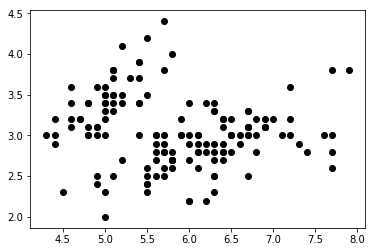

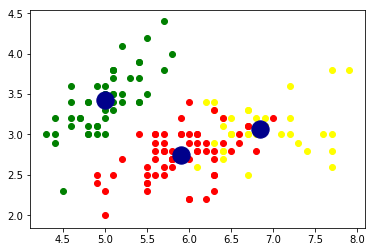

In [849]:
#Visualization
plt.scatter(x[:,0],x[:,1],c='black')

plt.show()

color=['green','yellow','red']
labels=['cluster1','cluster2','cluster3']
for i in range(k):
    plt.scatter(result[i+1][:,0],result[i+1][:,1],c=color[i],label=labels[i])
plt.scatter(Centroids[0,:],Centroids[1,:],s=300,c='darkblue',label='Centroids')

plt.show()
